In [35]:
# Import the necessary packages and data
from collections import defaultdict
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
sns.set()
path = os.path.expanduser('~/Projects/capstone-two/data/processed/Clean_Harbor_Water_Quality.csv', )
wq_df = pd.read_csv(path, parse_dates=['Sample Date'], index_col=0)

In [36]:
times = []
for i in wq_df['Sample Time']:
    try:
        times.append(datetime.strptime(i, '%I:%M%p').time())
    except:
        times.append(np.nan)
wq_df['Sample Time'] = times

In [37]:
wq_df.head()

,Sampling Location,Sample Date,Sample Time,Weather Condition (Dry or Wet),Top Sample Temperature (ºC),Bottom Sample Temperature (ºC),Site Actual Depth (ft),Top Sample Depth(ft),Bottom Sample Depth (ft),Top Salinity (psu),...,Top Ortho-Phosphorus (mg/L),Top Total Kjeldhal Nitrogen (mg/L),Top Silica (mg/L),Total Phosphorus(mg/L),Top Total Suspended Solid (mg/L),Bottom Total Suspended Solid (mg/L),Top Active Chlorophyll 'A' (µg/L),Top Dissolved Organic Carbon (mg/L),Long,Lat
0,BR5,2015-08-17,13:07:00,D,24.68,NaN,13.0,3.0,NaN,25.58,...,0.124,0.435,2.610,0.188,16.0,NaN,8.96,2.39,-73.871333,40.813667
1,NC0,2014-02-26,10:45:00,D,2.51,2.46,15.0,3.0,12.0,21.66,...,0.049,1.700,1.550,0.183,11.0,9.00,29.90,3.08,-73.931556,40.714961
2,J7,2006-07-18,13:45:00,D,26.00,25.74,27.0,4.0,26.0,25.14,...,0.158,1.934,0.833,0.320,45.5,3.75,53.23,5.16,-73.820833,40.645333
3,N7,2011-05-18,11:30:00,W,13.90,13.80,53.0,3.0,51.0,17.40,...,NaN,0.717,1.715,0.098,14.0,10.00,1.40,3.00,-74.053833,40.643833
4,GC4,2013-12-10,NaN,W,NaN,NaN,NaN,NaN,NaN,NaN,...,0.070,0.990,3.120,0.154,9.0,NaN,1.60,4.07,-73.989073,40.678034


In [38]:
wq_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31005 entries, 0 to 31004
Data columns (total 47 columns):
Sampling Location                                                                   31005 non-null object
Sample Date                                                                         31005 non-null datetime64[ns]
Sample Time                                                                         29210 non-null object
Weather Condition (Dry or Wet)                                                      30601 non-null object
Top Sample Temperature (ºC)                                                         18996 non-null float64
Bottom Sample Temperature (ºC)                                                      17733 non-null float64
Site Actual Depth (ft)                                                              27886 non-null float64
Top Sample Depth(ft)                                                                18939 non-null float64
Bottom Sample Depth (ft)       

I will now examine the descriptive statistics of each column to identify values that are unexpectedly high or low.

In [42]:
wq_df_int = wq_df.select_dtypes(exclude=['object', 'datetime'])
wq_df_int.describe().iloc[:, :10]

,Top Sample Temperature (ºC),Bottom Sample Temperature (ºC),Site Actual Depth (ft),Top Sample Depth(ft),Bottom Sample Depth (ft),Top Salinity (psu),Bottom Salinity (psu),Top Conductivity (S/m),Bottom Conductivity (S/m),"CTD (conductivity, temperature, depth profiler) Top Dissolved Oxygen (mg/L)"
count,18996.000000,17733.000000,27886.000000,18939.000000,17836.000000,18968.000000,17720.000000,18758.000000,17528.000000,16217.000000
mean,18.703483,18.002141,28.630030,3.380010,32.244005,22.866737,24.809579,3.837574,4.090200,6.851332
std,6.801709,6.523780,21.298745,0.749955,20.358388,5.269741,3.794550,4.396670,4.665498,2.871964
min,-1.740000,-1.870000,0.020000,0.700000,1.000000,0.120000,0.200000,0.020000,0.000000,-1.120000
25%,15.737500,15.000000,14.000000,3.000000,17.000000,21.160000,23.060000,2.730000,2.980000,5.080000
50%,21.190000,20.340000,21.000000,3.000000,25.000000,24.060000,25.240000,3.370000,3.500000,6.410000
75%,23.570000,22.830000,40.000000,4.000000,43.000000,26.220000,27.270000,3.820000,3.900000,8.080000
max,30.010000,29.230000,230.000000,12.000000,107.000000,34.760000,44.730000,43.960000,62.560000,28.560000


- Columns that are ok:
Top Sample Temperature, Bottom Sample Temperature, Site Actual Depth, Top Sample Depth, Bottom Sample Depth, Top Salinity, Bottom Salinity, 
- Questionable values:
Top Conductivity (max looks high), Bottom Conductivity (max looks high), CTD Top Dissolved Oxygen (max looks high)

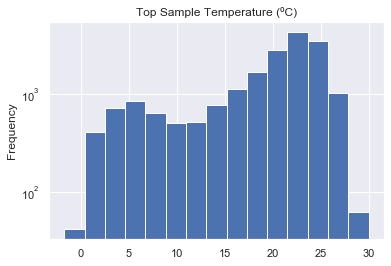

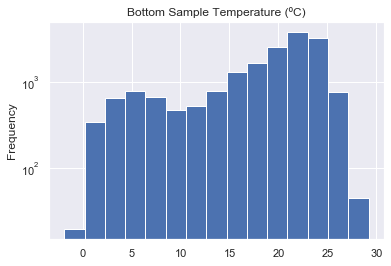

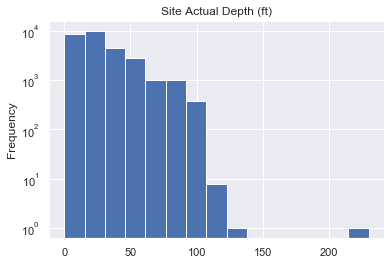

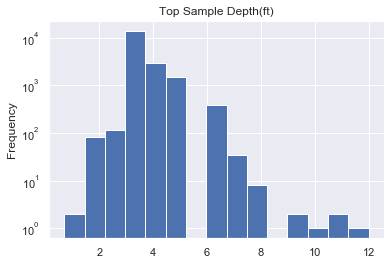

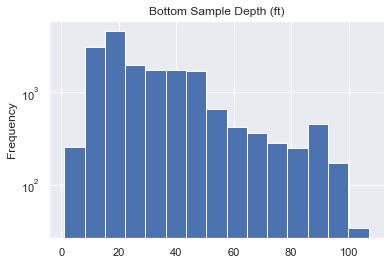

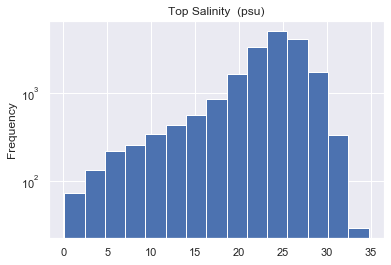

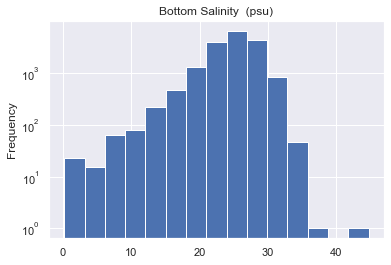

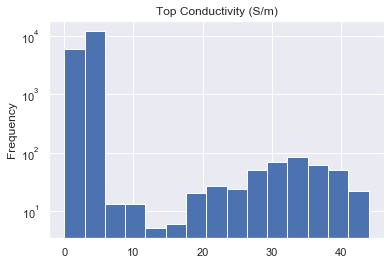

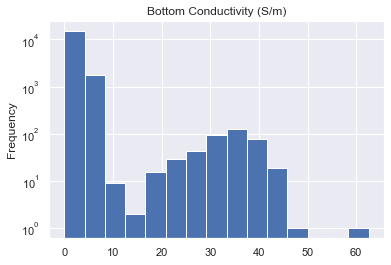

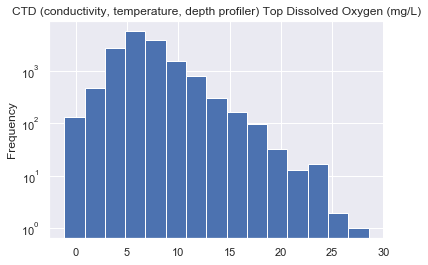

In [50]:
for col in wq_df_int.iloc[:, :10]:
    _ = plt.figure()
    _ = wq_df_int[col].plot(kind='hist', bins=15)
    _ = plt.yscale('log')
    _ = plt.title(col)
    _ = plt.show()

In [29]:
wq_df_int.describe().iloc[:, 10:20]

,"CTD (conductivity, temperature, depth profiler) Bottom Dissolved Oxygen (mg/L)",Percentage O2 Saturation Top Sample,Percentage O2 Saturation Bottom sample,Light Trans (% transparency) Top Sample,Light Trans (% transparency) Bottom Sample,Top Sigma-T (kg/m3),Bottom Sigma-T (kg/m3),Top Fluorometer (mg/m3),Bottom Fluorometer mg/m3,Top Sample Photosysthetically Active Radiation Reference (400-700nm light (uE/S)
count,15022.000000,17730.000000,16556.000000,11998.000000,11036.000000,18558.000000,17365.000000,15424.000000,14169.000000,11542.000000
mean,5.937268,81.913248,69.604548,59.592174,58.885732,15.648450,17.274156,16.224487,11.260035,1448.260487
std,2.735208,30.885682,25.489317,21.562496,23.318782,4.181427,3.212789,20.669278,14.166941,675.377857
min,-3.670000,-15.900000,-51.670000,-22.860000,-13.470000,-2.720000,-2.590000,-5.825500,-4.698800,0.000000
25%,4.390000,64.600000,56.585000,50.985000,50.600000,14.130000,15.690000,3.360000,2.800000,877.595000
50%,5.630000,78.780000,70.590000,65.400000,66.680000,16.320000,17.410000,8.735400,6.154700,1670.975000
75%,7.100000,93.207500,83.002500,73.960000,74.692500,18.110000,19.200000,20.213850,14.786900,1965.475000
max,29.670000,374.220000,283.240000,131.730000,130.550000,38.940000,31.510000,241.469500,196.503000,4027.700000


- Columns that are ok:
- Questionable values:
CTD Bottom DO (max looks high), Percentage O2 Sat Top (max looks high), Percentage O2 Bottom (looks high)

In [21]:
wq_df.describe().iloc[:, 20:30]

,Top Sample Par (uE/S m2),Bottom Sample Par uE/S (uE/S m2),Oxidation Reduction Potential (mV) Top Sample,Oxidation Reduction Potential (mV) Bottom Sample,Winkler Method Top Dissolved Oxygen (mg/L),Winkler Method Bottom Dissolved Oxygen (mg/L),Secchi Depth (ft),Top PH,Bottom PH,Top Fecal Coliform Bacteria (Cells/100mL)
count,12577.000000,11639.000000,12333.000000,11414.000000,22797.000000,20295.000000,23022.000000,27625.000000,20673.000000,28862.000000
mean,1039.664966,21.450814,184.207865,184.500299,7.465010,6.761521,3.922993,7.649962,7.624497,2508.636096
std,1208.230907,78.128448,114.764149,119.531039,2.781568,2.676117,1.872168,0.557454,0.574186,15523.986296
min,-3.260000,-14.860000,-453.000000,-455.000000,0.000000,0.000000,0.500000,0.330000,0.000000,0.000000
25%,99.580000,0.000000,127.056000,124.108750,5.600000,5.080000,3.000000,7.400000,7.400000,11.000000
50%,452.000000,0.070000,188.857000,187.991500,6.960000,6.320000,3.500000,7.620000,7.600000,50.000000
75%,1811.000000,8.000000,238.850000,241.260000,9.030000,8.160000,5.000000,7.870000,7.830000,264.000000
max,31579.900000,2363.000000,1165.560000,1131.620000,23.980000,87.210000,28.500000,78.000000,75.000000,200000.000000


- Columns that are ok:
- Questionable values:

In [23]:
wq_df.describe().iloc[:, 30:40]

,Top Enterococci Bacteria (Cells/100mL),Top Nitrate/Nitrite (mg/L),Top Ammonium (mg/L),Top Ortho-Phosphorus (mg/L),Top Total Kjeldhal Nitrogen (mg/L),Top Silica (mg/L),Total Phosphorus(mg/L),Top Total Suspended Solid (mg/L),Bottom Total Suspended Solid (mg/L),Top Active Chlorophyll 'A' (µg/L)
count,28903.000000,28602.000000,28574.000000,19297.000000,28533.000000,28507.000000,28554.000000,28503.000000,20709.000000,28474.000000
mean,463.049614,0.388856,0.452576,0.165340,1.183278,2.151428,0.249150,14.555029,17.591278,16.219485
std,5052.267825,0.566747,0.918426,0.275925,1.865418,2.331622,0.330311,18.827639,21.909812,25.121986
min,0.000000,0.001000,0.002000,0.000000,0.033000,0.014000,0.009000,0.000000,0.000000,0.090000
25%,2.000000,0.179000,0.193000,0.070000,0.608000,1.020000,0.129000,7.000000,7.400000,2.650000
50%,6.000000,0.304000,0.315000,0.115000,0.858000,1.697000,0.181000,11.000000,12.000000,6.780000
75%,32.000000,0.438000,0.472000,0.164000,1.270000,2.540000,0.258000,18.000000,21.000000,19.600000
max,200000.000000,12.100000,29.000000,5.210000,44.800000,28.834000,15.500000,1805.000000,704.400000,770.000000


- Columns that are ok:
- Questionable values:

In [17]:
wq_df.describe().iloc[:, 40:]

,Top Dissolved Organic Carbon (mg/L),Long,Lat
count,27732.000000,31003.000000,31003.000000
mean,3.359917,-73.922439,40.683739
std,1.290050,0.927987,0.926517
min,0.500000,-74.258833,-73.990053
25%,2.700000,-73.989073,40.627000
50%,3.200000,-73.899833,40.666667
75%,3.800000,-73.847613,40.782500
max,97.000000,40.679429,40.914500
